# Coup-Proofing via Capital Relocation

DSAN 6750 / PPOL 6805: GIS for Spatial Data Science

Jeff Jacobs (Georgetown University)

## Introduction

Several previous studies have found robust relationships between spatial properties of a country’s **capital city** and that country’s propensity for **conflict** and **misgovernance**.

Perceptions of this linkage also have an effect on “coup-proofing” decisions made by national governments. A recent BBC interview with Equatorial Guinea’s President Teodoro Obiang, for example, highlighted this as a factor behind his decision to relocate the capital city:

> It’s the remoteness of Oyala that makes it so appealing to President Obiang. In a rare interview he described how rebels had recently plotted a seaborne assault on his palace in the current capital, Malabo. ‘We need a secure place for my government and for future governments. That’s why we have created Oyala, to guarantee the government of Equatorial Guinea.’ ([Sackur 2012](#ref-sackur_equatorial_2012))

This case is far from exceptional, as an even more recent *Washington Post* article points out with respect to Myanmar’s decision to move its capital from Yangon to Naypyidaw:

> Analysts have described the decision as motivated by a desire to secure the military’s seat of power from any threat of protests or invasions. ([Berger 2021](#ref-berger_myanmars_2021))

Most of these studies, however, are based on observations of **conflict events**. In this study, we study the more fundamental variable of a capital’s distance from the **population centroid** of the country.

## Literature Review

Campante, Do, and Guimaraes ([2019](#ref-campante_capital_2019)) analyzes the relationship between the location of a **capital city** and the degree of conflict and misgovernance in a given country. Their two key findings are that:

> Conflict is more likely to emerge (and dislodge incumbents) closer to the capital

and

> Isolated capitals are associated with misgovernance.

This first finding is illustrated in <a href="#fig-conflict-dist" class="quarto-xref">Figure 1</a>

<figure id="fig-conflict-dist">

<figcaption>Figure 1</figcaption>
</figure>

## Methodology

The **population centroids** we use herein might require some explanation, since the term “centroid” can be ambiguous.

Here, the population centroids are drawn from Hall et al. ([2019](#ref-hall_population_2019))

## Exploratory Data Analysis (EDA)

Here we plot the base GIS objects we’re analyzing: the location of each **capital city** (in purple) and each **population centroid** (in yellow).

In [ ]:
library(tidyverse) |> suppressPackageStartupMessages()
library(sf) |> suppressPackageStartupMessages()
library(mapview) |> suppressPackageStartupMessages()
library(units) |> suppressPackageStartupMessages()
cb_palette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

In [ ]:
merged_long_sf <- readRDS("data/merged_long_sf.rds")
mapview(merged_long_sf, zcol="name", cex=4, label="geounit")

Warning in validateCoords(lng, lat, funcName): Data contains 3 rows with either
missing or invalid lat/lon values and will be ignored

We then construct an **area-normalized** measure of capital-centroid distance $\text{dist}^{\textsf{AN}}$, using the formula

$$
\text{dist}^{\textsf{AN}}_i = \text{dist}_i / \sqrt{\text{area}_i}.
$$

A plot of this measure by country looks as follows:

In [ ]:
merged_area_sf <- readRDS("data/merged_area_sf.rds")
mapview(merged_area_sf, zcol="scaled_dist")

## Hypothesis Testing (Regression)

In [ ]:
merged_sub_sf <- readRDS("data/merged_sub_sf.rds")
merged_sub_sf |> head()

(`stat_smooth()`).

ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?

(`geom_point()`).

(`geom_text()`).

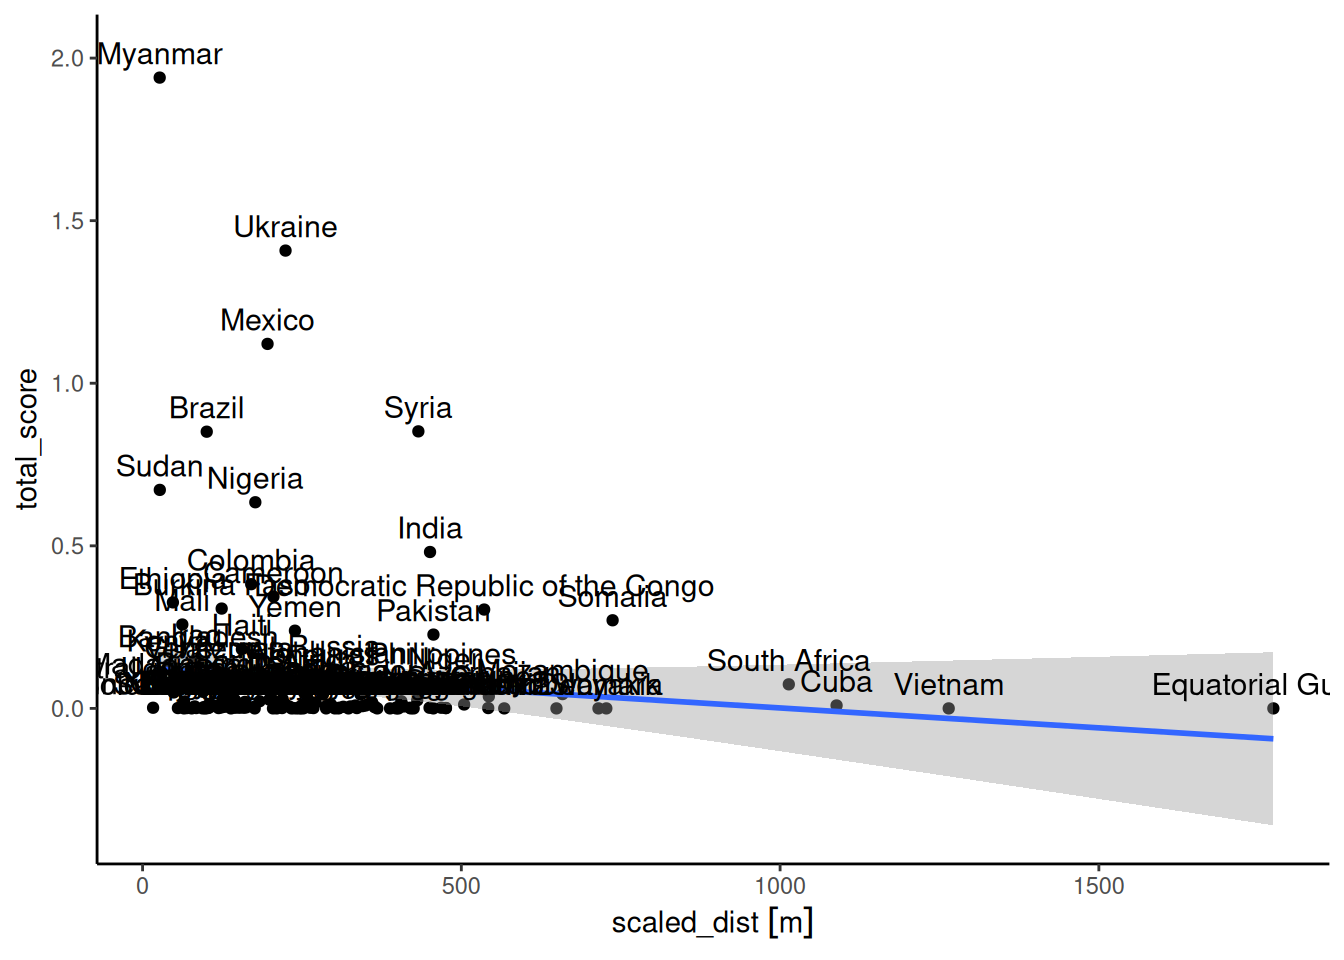

In [ ]:
merged_sub_sf |> ggplot(aes(x=scaled_dist, y=total_score, label=NAME_ENGLI)) +
  geom_point() +
  geom_smooth(method='lm', formula= y~x) +
  geom_text(size=4, nudge_y = 0.075) +
  theme_classic()

## Discussion

## Conclusion

Our evidence indicates that the spatial dynamics of **conflict** differ from the spatial dynamics of **misgovernance**.

Berger, Miriam. 2021. “Myanmar’s Military Built a New Capital as a Haven for Power. Other Countries Have Tried That, Too.” *Washington Post*, February. <https://www.washingtonpost.com/world/2021/02/06/myanmars-military-built-new-capital-haven-power-other-countries-have-tried-that-too/>.

Campante, Filipe R., Quoc-Anh Do, and Bernardo Guimaraes. 2019. “Capital Cities, Conflict, and Misgovernance.” *American Economic Journal: Applied Economics* 11 (3): 298–337. <https://doi.org/10.1257/app.20170111>.

Hall, Ola, Maria Francisca Archila Bustos, Niklas Boke Olén, and Thomas Niedomysl. 2019. “Population Centroids of the World Administrative Units from Nighttime Lights 1992-2013.” *Scientific Data* 6 (1): 235. <https://doi.org/10.1038/s41597-019-0250-z>.

Sackur, Stephen. 2012. “Equatorial Guinea: Obiang’s Future Capital, Oyala.” *BBC News*, December. <https://www.bbc.com/news/magazine-20731448>.